In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
from src.lmm_fatigue_learning import run_fatigue_learning_lmm_table, prettify_fatigue_table, add_fdr

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
R callback write-console: Registered S3 methods overwritten by 'MuMIn':
  method        from 
  nobs.multinom broom
  nobs.fitdistr broom
  
R callback write-console: also installing the dependencies 'estimability', 'mvtnorm'

  
R callback write-console: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/estimability_1.5.1.zip'
  
R callback write-console: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/mvtnorm_1.3-3.zip'
  
R callback write-console: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/emmeans_1.11.2-8.zip'
  


package 'estimability' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'emmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpIXqVBV\downloaded_packages


# Fatigue and Learning

In this notebook we will analyze the effect of fatigue/learning based on the force plate measurements (gold standard)

In [7]:
# Load data
older_adults_trial_level = pd.read_csv("../data/processed/older_adults/trial_measurements.csv")

## Average Trends

In [ ]:
def plot_learning_fatigue_trend(df):
    force_df = df[df['device'] == 'Force_Plate']
    metrics = force_df['metric'].unique()

    for metric in metrics:
        if metric in metrics:
            metric_df = force_df[force_df['metric'] == metric]

            plt.figure(figsize=(6, 3))
            sns.lineplot(
                data=metric_df,
                x='trial', y='value',
                hue='state',
                errorbar=('ci', 95),
                estimator='mean'
            )

            plt.title(f'Average Trend – {metric}')
            plt.ylabel('Value')
            plt.xlabel('Trial')
            plt.xticks([1, 2, 3, 4, 5])
            plt.ylim(bottom=0)
            plt.grid(True)
            plt.legend(title='State')

            plt.tight_layout()
            plt.show()

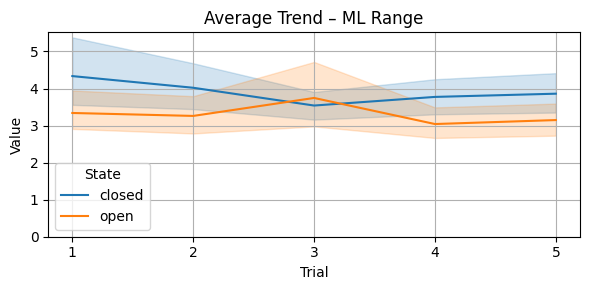

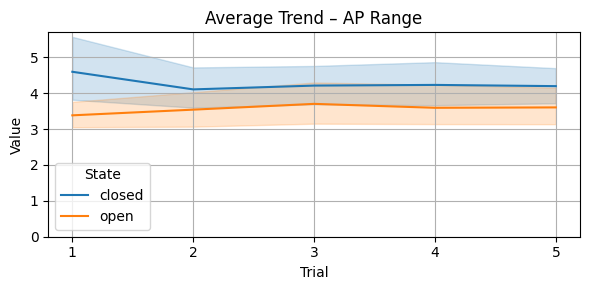

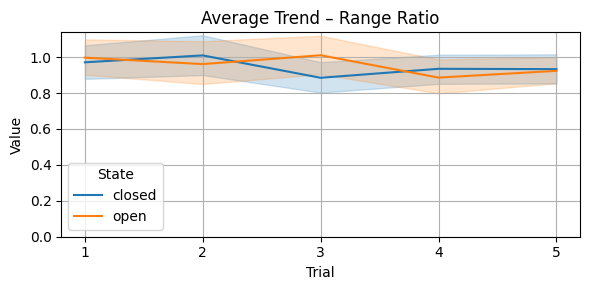

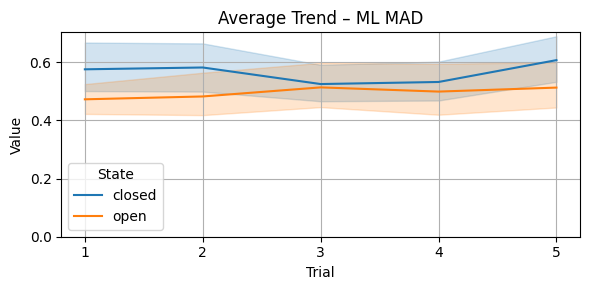

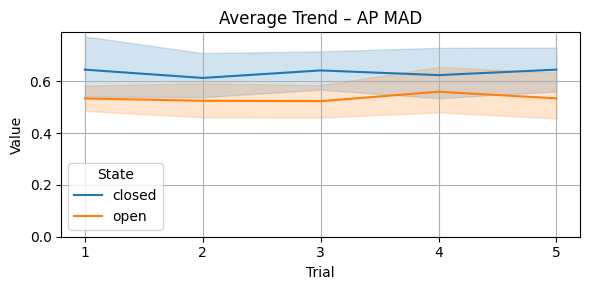

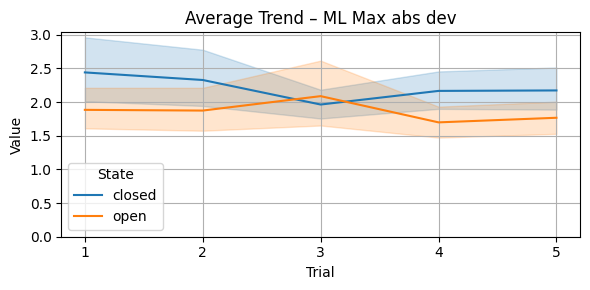

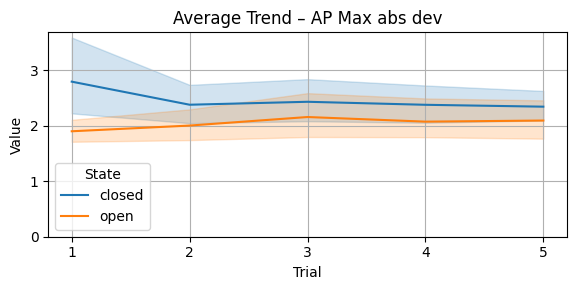

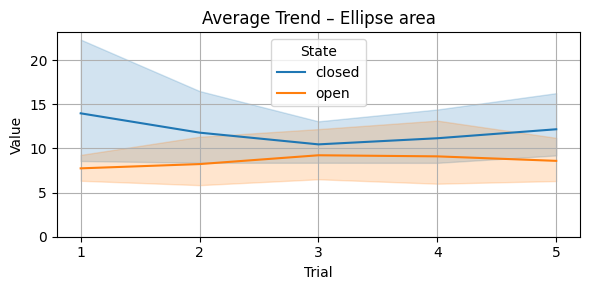

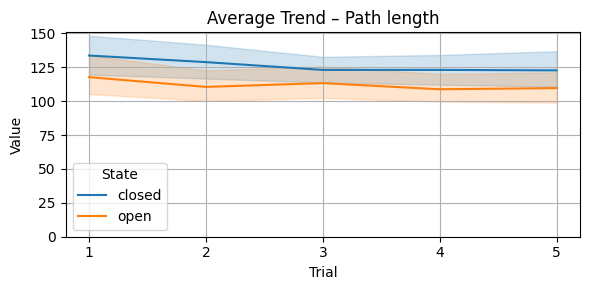

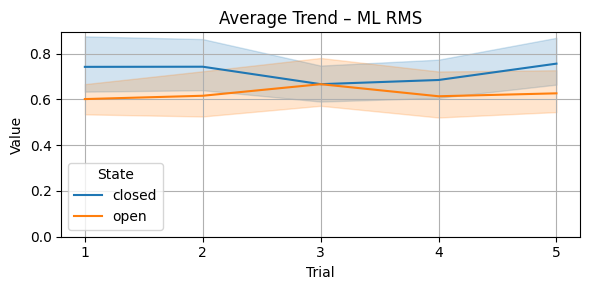

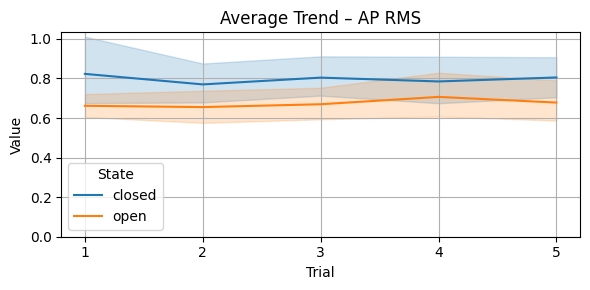

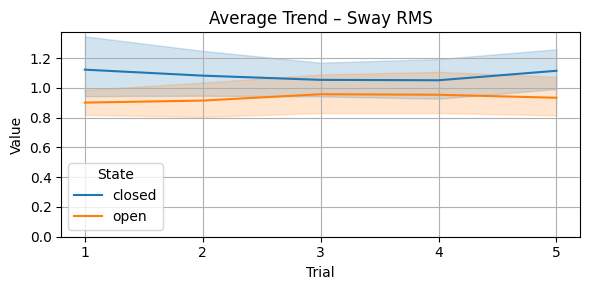

In [9]:
plot_learning_fatigue_trend(older_adults_trial_level)

In [12]:
def plot_participants_side_by_side_per_metric(
    df,
    show_mean=True
):
    """
    For each metric, plot states (open/closed) side-by-side.
    Each subplot shows all participants' trajectories across trials
    plus an optional bold mean line.
    """

    d = df[df["device"] == "Force_Plate"].copy()
    d["trial"] = pd.to_numeric(d["trial"], errors="coerce")

    force_df = df[df['device'] == 'Force_Plate']
    metrics = force_df['metric'].unique()

    for metric in metrics:
        dm = d[d["metric"] == metric]

        fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

        for ax, state in zip(axes, ["open", "closed"]):
            dms = dm[dm["state"].str.lower() == state]

            # Plot each participant
            for pid, g in dms.groupby("participant name"):
                g = g.sort_values("trial")
                ax.plot(g["trial"], g["value"], linewidth=1, alpha=0.35)

            # Optional mean overlay
            if show_mean:
                mean_by_trial = dms.groupby("trial")["value"].mean()
                ax.plot(mean_by_trial.index, mean_by_trial.values,
                        linewidth=2.5, label="Mean", zorder=5)

            ax.set_title(f"{metric} — {state}")
            ax.set_xlabel("Trial")
            ax.set_xticks([1, 2, 3, 4, 5])
            ax.grid(True, alpha=0.4)

            if show_mean:
                ax.legend(frameon=False)

        axes[0].set_ylabel("Value")
        plt.tight_layout()
        plt.show()

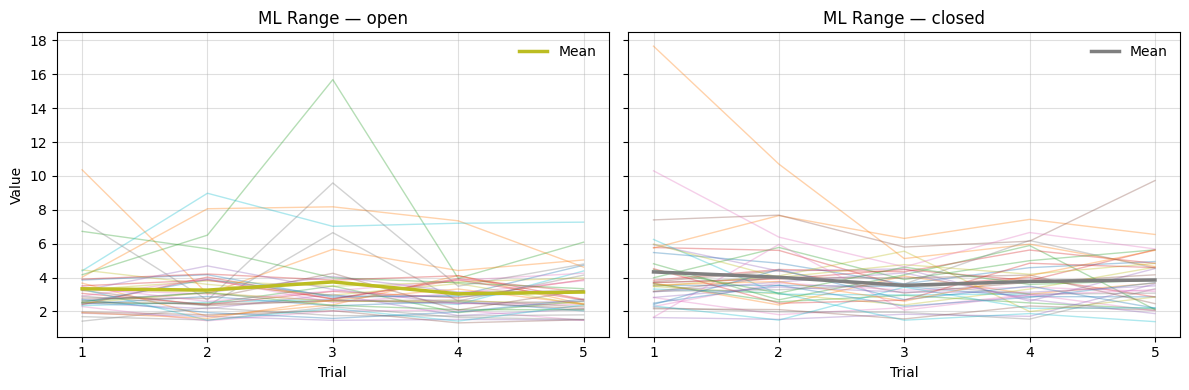

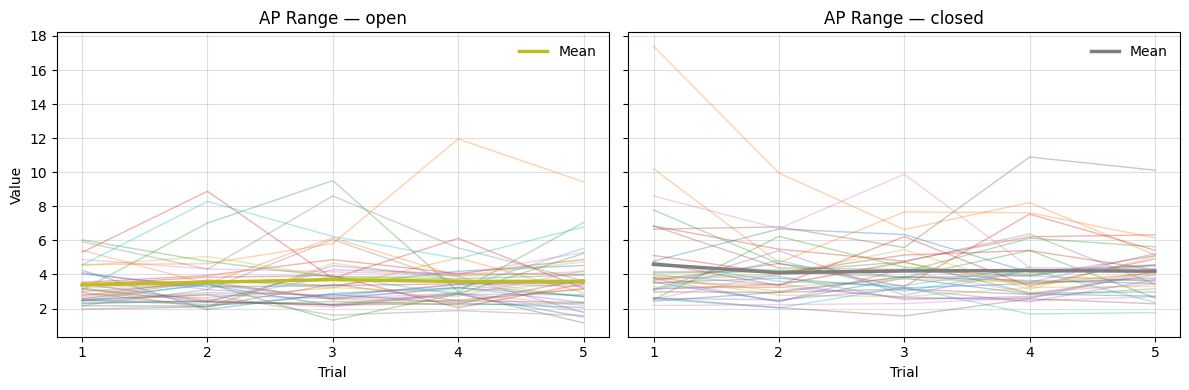

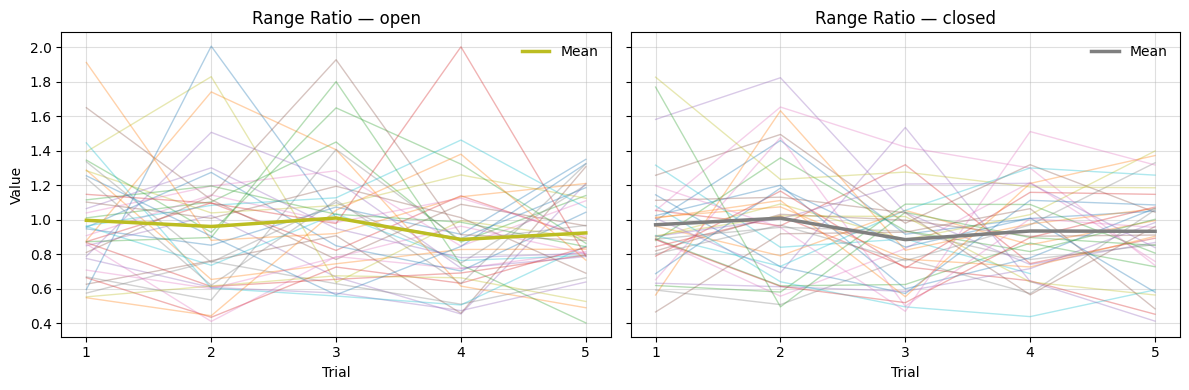

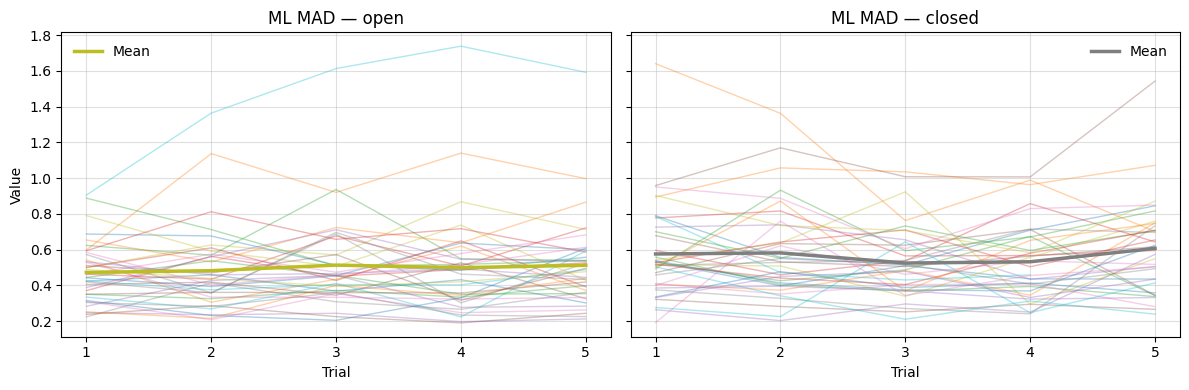

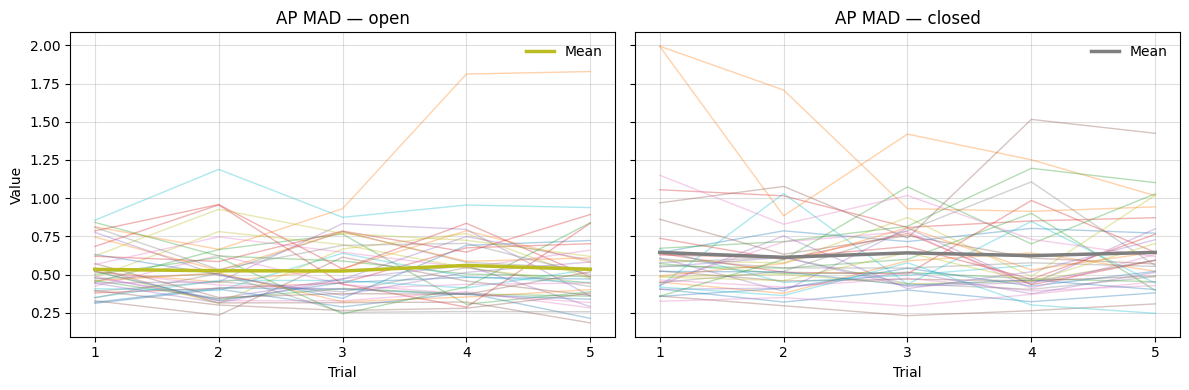

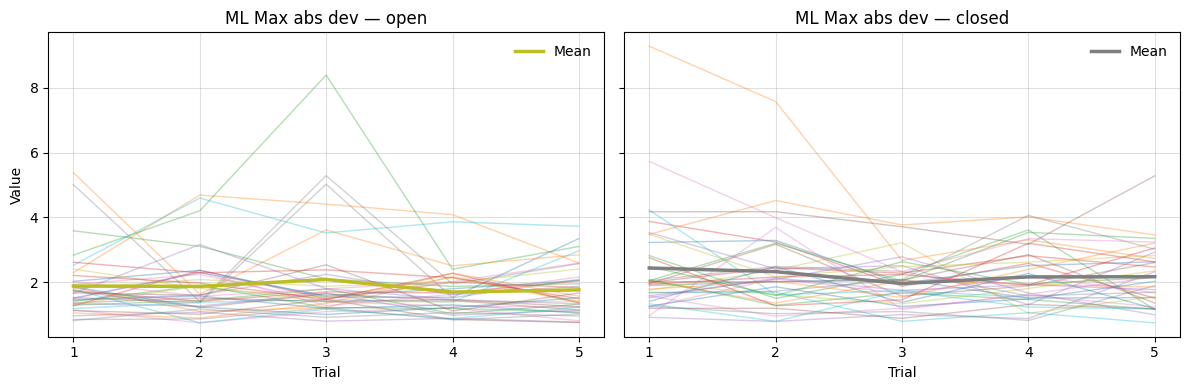

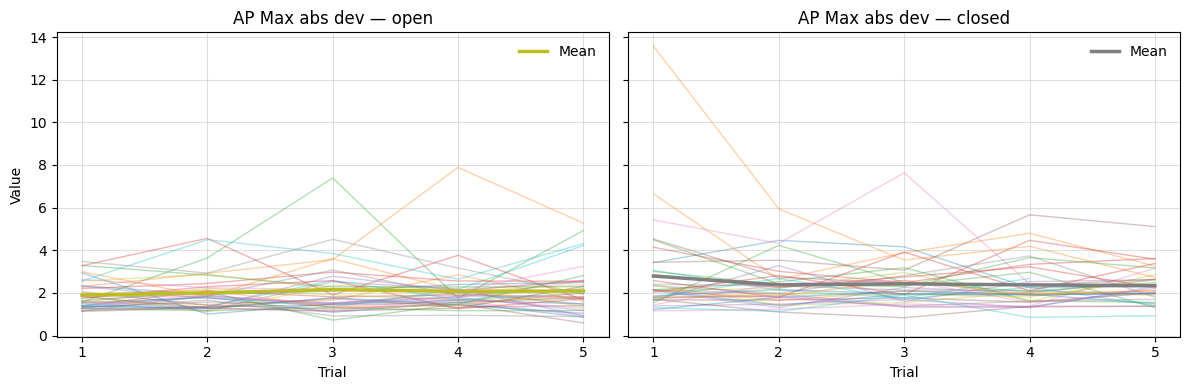

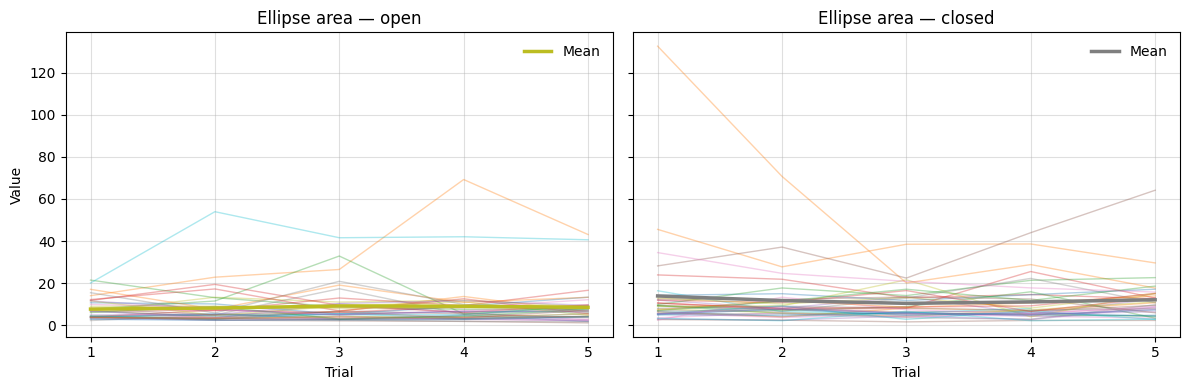

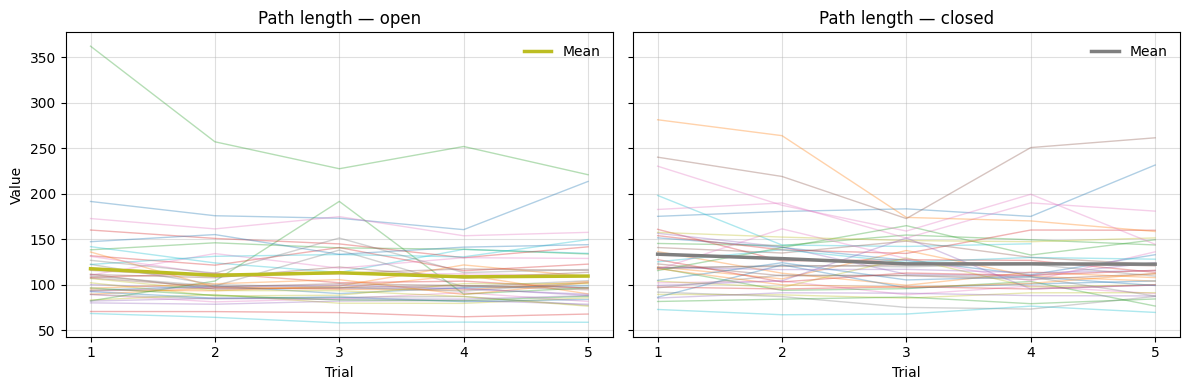

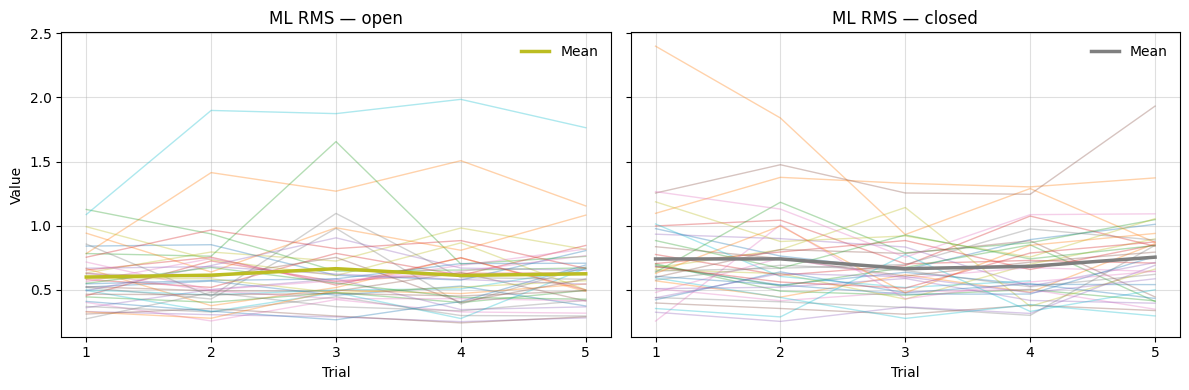

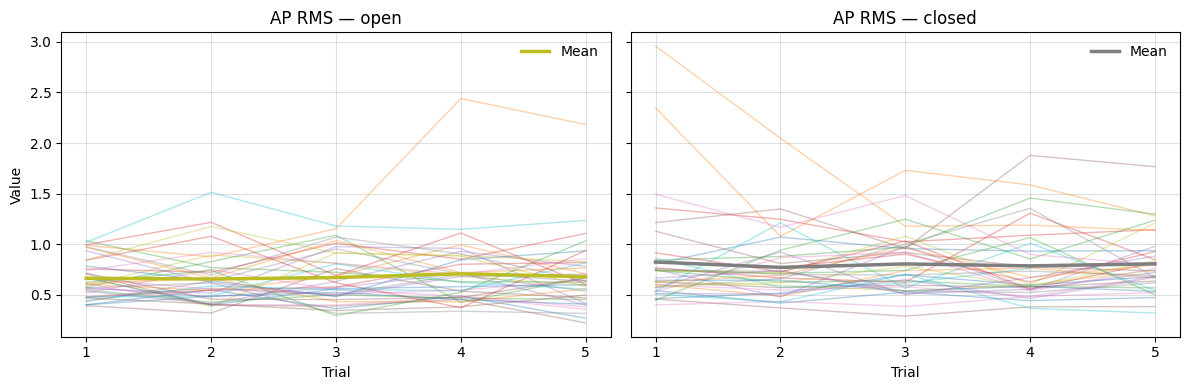

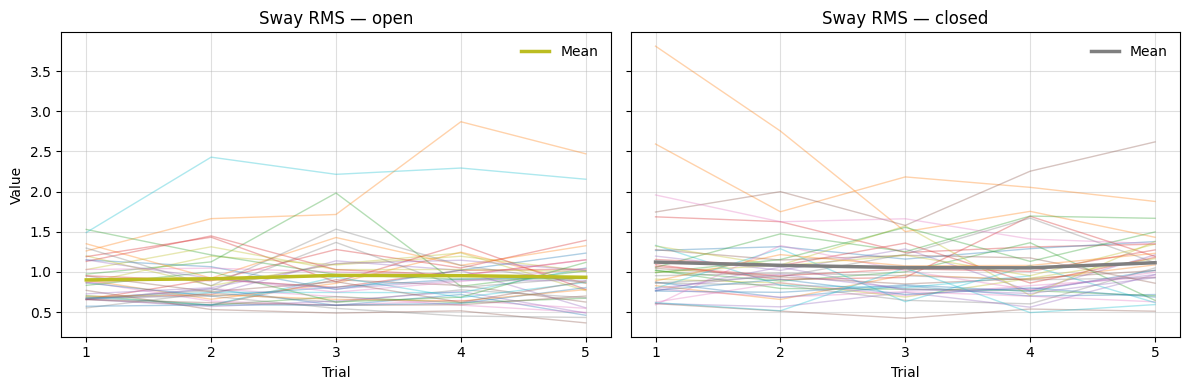

In [13]:
plot_participants_side_by_side_per_metric(older_adults_trial_level)